In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [145]:
dataset = pd.read_csv('IRIS.csv')
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [146]:
dataset.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [147]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [148]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [149]:
dataset['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

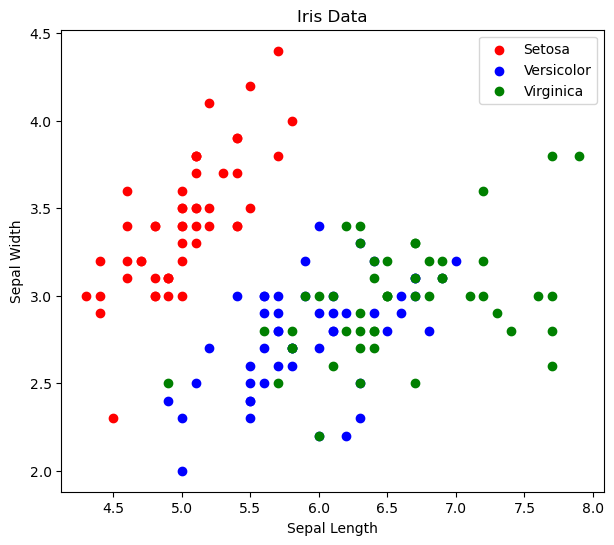

In [150]:
plt.figure(figsize=(7,6))
plt.scatter(dataset[dataset['species']=='setosa']['sepal_length'],dataset[dataset['species']=='setosa']['sepal_width'],color='red',label='Setosa')
plt.scatter(dataset[dataset['species']=='versicolor']['sepal_length'],dataset[dataset['species']=='versicolor']['sepal_width'],color='blue',label='Versicolor')
plt.scatter(dataset[dataset['species']=='virginica']['sepal_length'],dataset[dataset['species']=='virginica']['sepal_width'],color='green',label='Virginica')
plt.title('Iris Data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

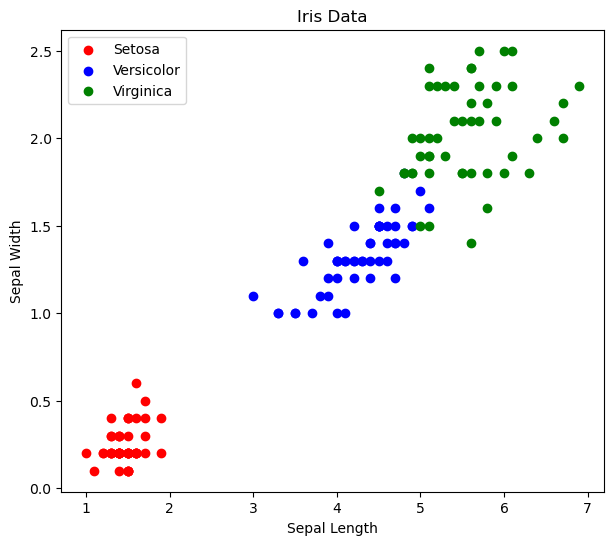

In [151]:
plt.figure(figsize=(7,6))
plt.scatter(dataset[dataset['species']=='setosa']['petal_length'],dataset[dataset['species']=='setosa']['petal_width'],color='red',label='Setosa')
plt.scatter(dataset[dataset['species']=='versicolor']['petal_length'],dataset[dataset['species']=='versicolor']['petal_width'],color='blue',label='Versicolor')
plt.scatter(dataset[dataset['species']=='virginica']['petal_length'],dataset[dataset['species']=='virginica']['petal_width'],color='green',label='Virginica')
plt.title('Iris Data')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

In [188]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [189]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [190]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [191]:
from sklearn.svm import SVC

reg = SVC(kernel='rbf')
reg.fit(X_train,y_train)

SVC()

In [192]:
y_pred = reg.predict(X_test)

In [193]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

Accuracy Score: 0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]


In [198]:
le.inverse_transform(reg.predict([['6.7','3.0','5.2','2.3']]))[0]

'virginica'